<a href="https://colab.research.google.com/github/nagrawa6/NASA-SEES/blob/main/Nikita_Agrawal_NASA_SEES_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from skimage import io
import cv2 as cv
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/My Drive/Colab Notebooks/Data/Master Sheet - Combined Master Sheet.csv')

Mounted at /content/drive


3278

# Model

In [ ]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros([dim,1])
    b = 0.0    
    return w, b

In [ ]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)

    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))  

    dw = 1 / m *(np.dot(X,(A - Y).T))
    db = 1 / m *(np.sum(A - Y))
    
    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db 

        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
        
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
def predict(w, b, X):    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X) + b)
    
    
    for i in range(A.shape[1]):
        if(A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1      
    
    return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    cf_matrix = confusion_matrix(Y_test, Y_prediction_test[0])
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix with Learning Rate = ' + str(learning_rate))
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Data Pre-Processing

In [ ]:
x_shape = (0, 12288)
X_train = np.ones(x_shape)
Y_train = np.array([])
for row in range(int(len(df)*0.6)): #int(len(df)*0.6)
  _url = df.iloc[row, 4]
  try:
    image = io.imread(_url) 

    np_image = np.array(cv.resize(image, dsize=(64, 64)))
    np_image = np_image / 255

    X_train = np.insert(X_train, len(X_train), np_image.reshape(1, 64 * 64 * 3), axis=0)
    Y_train = np.append(Y_train, int(df.iloc[row, 1] == "Anopheles"))
  except:
    pass
    
X_train = X_train.T

In [ ]:
x_shape = (0, 12288)
X_test = np.ones(x_shape)
Y_test = np.array([])
for row in range(int(len(df)*0.6), len(df)): #int(len(df)*0.6), len(df)
  _url = df.iloc[row, 4]
  try:
    image = io.imread(_url) 

    np_image = np.array(cv.resize(image, dsize=(64, 64)))
    np_image = np_image / 255

    X_test = np.insert(X_test, len(X_test), np_image.reshape(1, 64 * 64 * 3), axis=0)
    Y_test = np.append(Y_test, int(df.iloc[row, 1] == "Anopheles"))
  except:
    pass

X_test = X_test.T

# Results

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.382950
Cost after iteration 200: 0.380746
Cost after iteration 300: 0.379119
Cost after iteration 400: 0.377703
Cost after iteration 500: 0.376403
Cost after iteration 600: 0.375186
Cost after iteration 700: 0.374035
Cost after iteration 800: 0.372939
Cost after iteration 900: 0.371890
Cost after iteration 1000: 0.370882
Cost after iteration 1100: 0.369911
Cost after iteration 1200: 0.368972
Cost after iteration 1300: 0.368064
Cost after iteration 1400: 0.367182
Cost after iteration 1500: 0.366325
Cost after iteration 1600: 0.365490
Cost after iteration 1700: 0.364676
Cost after iteration 1800: 0.363882
Cost after iteration 1900: 0.363105


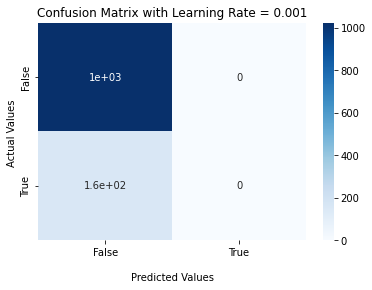

train accuracy: 87.47433264887064 %
test accuracy: 86.70618120237087 %


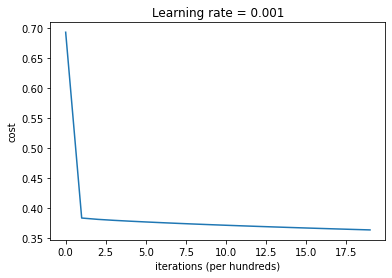

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.376399
Cost after iteration 200: 0.370880
Cost after iteration 300: 0.366323
Cost after iteration 400: 0.362344
Cost after iteration 500: 0.358769
Cost after iteration 600: 0.355500
Cost after iteration 700: 0.352475
Cost after iteration 800: 0.349653
Cost after iteration 900: 0.347002
Cost after iteration 1000: 0.344499
Cost after iteration 1100: 0.342123
Cost after iteration 1200: 0.339860
Cost after iteration 1300: 0.337698
Cost after iteration 1400: 0.335624
Cost after iteration 1500: 0.333631
Cost after iteration 1600: 0.331710
Cost after iteration 1700: 0.329856
Cost after iteration 1800: 0.328062
Cost after iteration 1900: 0.326323


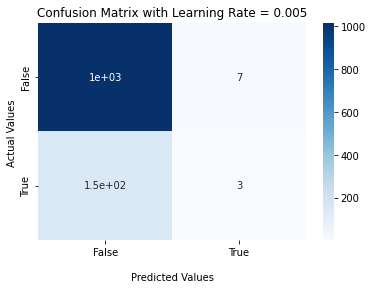

train accuracy: 87.47433264887064 %
test accuracy: 86.36748518204911 %


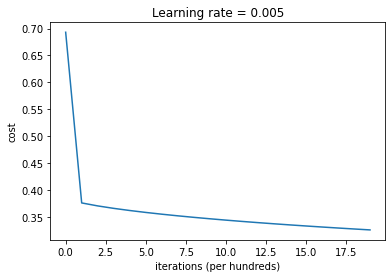

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.370879
Cost after iteration 200: 0.362346
Cost after iteration 300: 0.355501
Cost after iteration 400: 0.349654
Cost after iteration 500: 0.344499
Cost after iteration 600: 0.339861
Cost after iteration 700: 0.335624
Cost after iteration 800: 0.331711
Cost after iteration 900: 0.328062
Cost after iteration 1000: 0.324636
Cost after iteration 1100: 0.321398
Cost after iteration 1200: 0.318324
Cost after iteration 1300: 0.315393
Cost after iteration 1400: 0.312588
Cost after iteration 1500: 0.309896
Cost after iteration 1600: 0.307305
Cost after iteration 1700: 0.304806
Cost after iteration 1800: 0.302391
Cost after iteration 1900: 0.300053


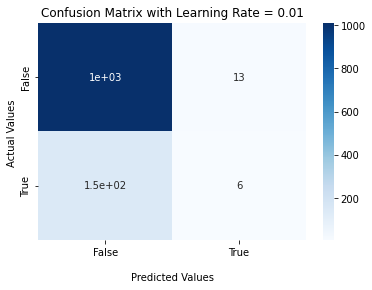

train accuracy: 88.24435318275154 %
test accuracy: 86.11346316680779 %


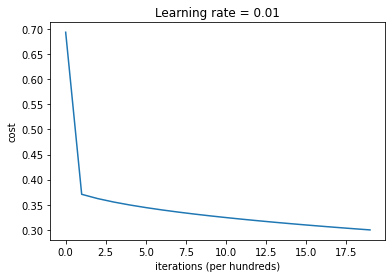

In [ ]:
learning_rate_vals = [0.001, 0.005, 0.01]
for learningRate in learning_rate_vals:
  logistic_regression_model = model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate = learningRate, print_cost=True)

  costs = np.squeeze(logistic_regression_model['costs'])
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate = " + str(logistic_regression_model["learning_rate"]))
  plt.show()